<a href="https://colab.research.google.com/github/Idowuilekura/dsn_ai_hackathon/blob/main/AIdsnbootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import sklearn 
from sklearn.feature_selection import RFE,SelectFromModel 
!pip install catboost 
!pip install boruta 
!pip install xgboost
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier 
import seaborn as sns 
import matplotlib.pyplot as plt 




     |████████████████████████████████| 66.1MB 44kB/s 
     |████████████████████████████████| 61kB 2.9MB/s 


Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import pylab 
sns.set_style('dark')
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/Train (2).csv")
test = pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/Test (2).csv")
submission = pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/SampleSubmission (1).csv")

In [ ]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


,form_field1
form_field1,1.0


In [ ]:
train.default_status.value_counts(normalize=True)

no     0.755089
yes    0.244911
Name: default_status, dtype: float64

In [ ]:
train.form_field48.value_counts()

0.000000       1416
7.674220         15
7.701687         11
7.700626         10
7.696985          9
               ... 
1845.508090       1
1664.606140       1
73.234571         1
285.261474        1
210.623539        1
Name: form_field48, Length: 32115, dtype: int64

In [ ]:
train.form_field4.value_counts()

0.0000     47900
13.7790      645
1.0404       139
12.4272      117
0.9000       116
           ...  
9.3510         1
1.2996         1
5.8212         1
22.6332        1
2.2734         1
Name: form_field4, Length: 2927, dtype: int64

In [ ]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [ ]:
test.describe(include='all')

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
count,24000,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,1.060200e+04,1.981700e+04,2.153700e+04,2.400000e+04,1.440800e+04,18526.000000,19305.000000,19631.000000,24000.000000,23853.000000,17293.000000,15276.000000,11875.000000,18395.000000,21744.000000,20828.000000,20090.000000,23853.000000,23853.000000,13092.000000,7190.000000,21744.000000,23505.000000,23853.000000,14134.000000,23097.000000,21744.000000,23853.000000,22171.000000,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,24000,1.507800e+04,23854.000000,1.920300e+04
unique,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,Apcnt_1007232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charge,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15467,NaN,NaN,NaN
mean,NaN,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,2.132302e+06,2.772047e+06,5.984000e+06,9.291862e+07,1.141483e+08,0.234265,0.267651,0.272477,0.938458,1.020459,87.114080,6653.189477,6473.026142,105.934375,2626.358030,10109.255617,6199.305027,17715.546221,16507.914099,5248.247174,10934.016134,946.711921,14.148066,0.229740,0.194071,12.777157,8.554544,8.506184,0.090749,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,NaN,3.015440e+05,1.064118,6.749843e+05
std,NaN,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,5.733605e+06,4.794095e+06,1.947650e+07,3.768364e+09,1.194017e+08,0.622532,0.701223,0.706765,1.705298,1.757307,53.179142,5701.118265,5929.962163,479.903878,1946.845869,8787.532233,5388.387561,27153.459422,9672.296721,3138.183322,6168.907825,1057.985881,15.511387,0.671496,0.558517,10.451113,9.469110,7.833898,0.408602,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,NaN,1.868574e+06,1.816837,6.561031e+06
min,NaN,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.811573e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.405000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000e+00
25%,NaN,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,2.039332e+05,2.715220e+05,2.007240e+05,1.657646e+07,4.952544e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.545000,1140.933750,858.157500,14.730000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.500000,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,135.531750,87.499500,0.000000

In [ ]:
train.describe(include='all')

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,56000,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,56000,3.511100e+04,55645.000000,4.494400e+04,56000
unique,56000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2
top,Apcnt_1189716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,charge,NaN,NaN,NaN,no
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36373,NaN,NaN,NaN,42285
mean,NaN,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,NaN,3.052449e+05,1.049061,6.005862e+05,NaN
std,NaN,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,NaN,1.647757e+06,1.806160,5.842405e+06,NaN
min,NaN,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000e+00,NaN
25%,NaN,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,

In [ ]:
train.default_status.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [ ]:
train_1 = train.copy()

In [ ]:
test_1 = test.copy()

In [ ]:
train.isnull().sum().sum()

528773

In [ ]:
train.drop('Applicant_ID',axis=1,inplace=True)
test.drop('Applicant_ID',axis=1,inplace=True)

In [ ]:
missing_train = train.isnull().sum()/len(train)*100
missing_train_index = list(missing_train[missing_train>0].index)
missing_list_int_train = list(train[missing_train_index].select_dtypes(include=['int','float']).columns)

In [ ]:
train.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [ ]:
dict_missing = train[missing_list_int_train].median().to_dict()

In [ ]:
train[['form_field47','default_status']] = train[['form_field47','default_status']].astype('category')

In [ ]:
test['form_field47'] = test['form_field47'].astype('category')

In [ ]:
test['form_field47'] = sklearn.preprocessing.LabelEncoder().fit_transform(test['form_field47'])

In [ ]:
test.select_dtypes("category")

""
0
1
2
3
4
...
23995
23996
23997
23998


In [ ]:
train.select_dtypes('category')

,default_status
0,no
1,no
2,yes
3,no
4,no
...,...
55995,no
55996,yes
55997,no
55998,no


In [ ]:
train.fillna(dict_missing,inplace=True)

In [ ]:
train.isnull().sum()

form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0
form_field50      0


In [ ]:
train.fillna(-9999,inplace=True
             )

In [ ]:
test.fillna(-9999,inplace=True)

In [ ]:
missing_test = test.isnull().sum()/len(test)*100
missing_test_index = list(missing_test[missing_test>0].index)
missing_list_int_test = list(test[missing_test_index].select_dtypes(include=['int','float']).columns)

In [ ]:
dict_missing_test = test[missing_list_int_test].median().to_dict()
test.fillna(dict_missing_test,inplace=True)

In [ ]:
list_train_int_columns = list(train.drop('default_status',axis=1).select_dtypes(include=['int','float']).columns)
list_test_int_columns = list(test.select_dtypes(include=['int','float']).columns)
from sklearn.preprocessing import StandardScaler 
standard_scaler = StandardScaler()
for col in list_train_int_columns:
  train[col] = standard_scaler.fit_transform(train[[col]])
  if col in list_test_int_columns:
    test[col] = standard_scaler.fit_transform(test[[col]])

In [ ]:
# cols =['form_field47',"default_status"]
# for col in cols:
#   train[col] = train[col].cat.codes
#   if col in test.columns:
#     test[col] = test[col].cat.codes

AttributeError: ignored

In [ ]:
list_train_cat_columns = list(train.drop('default_status',axis=1).select_dtypes(include=['category']).columns)
list_test_cat_columns = list(test.select_dtypes(include=['object']).columns)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in list_train_cat_columns:
  train[col] = label_encoder.fit_transform(train[col])
  if col in list_test_cat_columns:
    test[col] = label_encoder.fit_transform(test[col])

In [ ]:
train['form_field47'] = label_encoder.fit_transform(train['form_field47'])

In [ ]:
test.drop(["Applicant_ID","form_field47"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split 
x = train.drop(["Applicant_ID",'default_status','form_field47'],axis=1)
y = sklearn.preprocessing.LabelEncoder().fit_transform(train['default_status'])


In [ ]:
x.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field50
0,0.197136,0.271376,0.080634,0.078799,0.077402,-0.369691,0.243198,-0.484007,-0.370928,-0.016807,1.026013,0.005078,0.112694,0.010032,0.413794,0.551015,0.498816,0.477811,0.032716,0.082353,0.638984,-1.150588,-0.893233,0.562808,0.622914,0.903088,1.012034,-0.632754,0.072350,0.969593,-0.613246,0.347490,0.147465,0.082103,-1.191308,0.191735,0.329536,0.074076,0.285116,-0.529724,-0.681797,0.155569,0.096622,0.326160,1.126381,0.629779,0,-0.091618
1,0.204260,0.271530,0.078842,0.078799,0.077402,-0.369691,-0.290873,-0.415947,-0.116665,-0.347306,-0.191056,0.400016,-0.145915,-0.015110,-0.221660,0.551015,0.498816,0.477811,0.020886,0.081093,0.633389,1.177125,1.787980,0.551694,0.661300,0.560627,0.699188,-0.623694,-0.297837,0.946610,-0.613246,0.790520,0.153872,0.079583,0.839373,0.193890,0.333581,0.079112,0.285116,-0.529724,-0.681797,0.155517,0.102666,0.325981,-0.887787,0.629779,0,-0.091618
2,0.140146,0.271476,0.082517,0.078799,0.085315,-0.377504,-0.287711,-0.556673,-0.586996,-0.401888,-0.265578,-0.537740,-0.242492,-0.019371,-0.437081,-1.815433,-2.005485,-2.093700,-0.002774,0.078573,-1.591220,-1.150588,-0.893233,-1.785052,0.048189,-0.252330,-0.043468,-0.632754,-0.066356,-1.045940,1.818799,0.057840,0.142519,0.079583,-1.191308,0.191735,0.325490,0.076594,0.285116,1.888176,-0.681797,0.155418,0.112740,0.326187,1.126381,0.629779,0,-0.091618
3,0.174340,0.271330,0.079183,0.078799,0.077402,-0.219524,-0.173827,-0.447011,-0.386091,-0.306414,-0.265578,-0.354139,-0.188967,-0.007724,0.642479,0.550778,0.498566,0.477553,0.009056,0.079833,0.635785,0.871770,0.197323,0.551489,0.072943,-0.320991,-0.106192,-0.632754,-0.473653,-1.045940,-0.613246,0.191161,0.147353,0.080843,0.839576,0.187424,0.328187,0.074076,0.285495,-0.529724,-0.681797,0.155632,0.096622,0.326151,-0.887787,0.629779,0,-0.091618
4,0.173627,0.271569,0.079934,0.078799,0.077402,-0.368475,-0.328198,-0.494361,-0.529209,-0.428857,-0.146482,-0.343176,-0.219423,-0.015110,-0.504977,0.550778,0.498566,0.477553,0.032716,0.082353,0.632355,0.847843,1.323593,0.558332,0.037068,-0.389370,-0.168658,-0.632754,0.312957,1.853038,0.895283,0.117421,0.142744,0.079583,0.839373,0.198201,0.326164,0.099255,0.285116,1.888255,-0.681797,0.155491,0.106696,0.326067,1.126381,0.629779,0,-0.091618


In [ ]:
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,random_state=2020,n_estimators=1000)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=2020, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score
x_test_predict =rf.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,x_test_predict))

0.8326436398517406


In [ ]:
train_1 = pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/Train (2).csv")
test_2= pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/Test (2).csv")
train_1,test_2 = train_1.drop("Applicant_ID",axis=1),test_2.drop("Applicant_ID",axis=1)

In [ ]:
cat_columns=np.where(train_1.dtypes=='object')
cat_columns

(array([46, 50]),)

In [ ]:
train_1.shape[1]

51

In [ ]:
x_cat_train,x_cat_test,y_cat_train,y_cat_test = train_test_split(train_1.drop("default_status",axis=1),train_1['default_status'],test_size=0.2,random_state=1)
y_cat_train= sklearn.preprocessing.LabelEncoder().fit_transform(y_cat_train)
y_cat_test = sklearn.preprocessing.LabelEncoder().fit_transform(y_cat_test)

In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(random_seed=63,iterations=1000,learning_rate=0.03,l2_leaf_reg=3,bagging_temperature=1,random_strength=1,one_hot_max_size=2,
                        leaf_estimation_method='Newton',depth=6)
cb.fit(x_train,y_train,eval_set=(x_test,y_test))

0:	learn: 0.6763002	test: 0.6764150	best: 0.6764150 (0)	total: 35.9ms	remaining: 35.9s
1:	learn: 0.6605759	test: 0.6607559	best: 0.6607559 (1)	total: 68ms	remaining: 34s
2:	learn: 0.6458469	test: 0.6461876	best: 0.6461876 (2)	total: 98.7ms	remaining: 32.8s
3:	learn: 0.6317206	test: 0.6320273	best: 0.6320273 (3)	total: 130ms	remaining: 32.4s
4:	learn: 0.6198419	test: 0.6203645	best: 0.6203645 (4)	total: 162ms	remaining: 32.2s
5:	learn: 0.6072409	test: 0.6078323	best: 0.6078323 (5)	total: 198ms	remaining: 32.8s
6:	learn: 0.5961856	test: 0.5969008	best: 0.5969008 (6)	total: 231ms	remaining: 32.8s
7:	learn: 0.5855913	test: 0.5864101	best: 0.5864101 (7)	total: 268ms	remaining: 33.3s
8:	learn: 0.5753634	test: 0.5762621	best: 0.5762621 (8)	total: 301ms	remaining: 33.2s
9:	learn: 0.5662612	test: 0.5671906	best: 0.5671906 (9)	total: 336ms	remaining: 33.2s
10:	learn: 0.5573200	test: 0.5582345	best: 0.5582345 (10)	total: 370ms	remaining: 33.2s
11:	learn: 0.5503900	test: 0.5513141	best: 0.5513141 

In [ ]:
x_train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
12227,-0.083858,0.994316,-0.488219,-0.268894,-0.185487,-0.270931,-0.289670,-0.361787,0.056802,-0.288591,-0.334860,-0.111432,-0.122390,-0.017666,-0.199014,-0.319512,-0.325766,-0.333807,0.029525,-0.014065,-0.553388,0.045392,0.425633,-0.072635,0.471260,1.010621,1.233947,-0.638733,0.502768,0.104555,-0.024597,2.290345,-0.837991,-0.33589,-0.260256,0.501970,3.121455,1.436486,-0.205797,0.022842,0.154098,0.053286,0.866600,-1.025190,-0.162574,-0.238027,-0.145615,-0.023531,-0.091998
47159,-0.094718,-0.667863,-0.488219,-0.268894,-0.185487,1.122410,-0.249330,-0.086334,-0.464509,-0.386567,-0.179079,-0.596525,-0.250560,-0.007724,-0.069904,-0.319512,-0.325766,-0.333807,-0.546380,-0.575446,0.042239,-0.091622,-0.110428,-0.087683,0.695015,-0.199741,-0.182431,-0.566332,0.663725,1.207266,-0.024597,0.628305,-0.041379,-0.33589,-0.260256,-1.029948,1.097527,-0.828655,-0.205797,0.022842,0.682607,-0.158384,-0.883436,1.249615,-0.162574,-0.238027,-0.145606,-0.578367,-0.091998
52203,-0.692015,0.524373,-0.488219,-0.268894,-0.185487,-0.396261,-0.317956,-0.444490,-0.251717,-0.350221,-0.179079,0.603285,0.147092,-0.011275,-0.199014,1.487829,1.205193,1.174316,2.333149,2.231460,1.072946,0.965979,1.224110,0.028970,-0.882497,-0.610863,-0.564262,1.622294,-1.211410,0.104555,-0.024597,-0.374132,1.828457,-0.33589,-0.260256,0.693460,-0.926401,1.939850,-0.205797,0.022842,0.154098,0.303915,1.502977,-1.385379,-0.162574,-0.238027,-0.145494,2.195813,-0.091998
14507,0.057321,1.304741,0.678058,-0.268894,0.843838,-0.382778,-0.141706,0.475356,-0.389507,-0.217214,-0.179079,-0.496408,-0.200374,-0.007724,-0.199014,-0.319512,-0.325766,-0.333807,0.605431,0.547317,0.899974,-1.121759,-1.312072,-0.217891,-0.746961,-0.988394,-1.142879,-0.631961,-0.065408,0.104555,0.113784,-0.751048,0.821618,-0.33589,-0.260256,-0.263989,-0.701520,0.178074,-0.205797,-0.729506,0.154098,0.838125,-0.406153,-0.641610,-0.162574,-0.238027,-0.145607,1.449561,-0.091998
11125,-1.158992,-0.590116,2.150258,-0.268894,4.668809,-0.305251,-0.354888,-0.361787,-0.343682,-0.443476,0.261227,-0.317543,-0.232267,-0.019371,-0.861493,-0.319512,-0.325766,-0.333807,-0.546380,-0.575446,0.042239,-0.091622,-0.110428,-0.087683,0.765590,-0.199741,-0.182431,-0.636500,0.417464,0.104555,0.474305,-0.025284,-0.683090,-0.33589,-0.260256,0.693460,0.198004,-0.828655,-0.205797,2.450170,0.154098,0.184268,-0.883436,1.219051,-0.162574,-0.238027,-0.145606,3.664545,-0.091998


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000,boosting_type='Plain',bootstrap_type='Bernoulli',one_hot_max_size=20,rsm=0.1,leaf_estimation_iterations=3,max_ctr_complexity=2,border_count=32)
cb.fit(x_train,y_train,eval_set=(x_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6773691	test: 0.6773294	best: 0.6773294 (0)	total: 23.5ms	remaining: 23.5s
1:	learn: 0.6626792	test: 0.6627275	best: 0.6627275 (1)	total: 35ms	remaining: 17.5s
2:	learn: 0.6491477	test: 0.6491691	best: 0.6491691 (2)	total: 46.1ms	remaining: 15.3s
3:	learn: 0.6360570	test: 0.6361569	best: 0.6361569 (3)	total: 56.8ms	remaining: 14.1s
4:	learn: 0.6232554	test: 0.6234591	best: 0.6234591 (4)	total: 68.3ms	remaining: 13.6s
5:	learn: 0.6116728	test: 0.6119505	best: 0.6119505 (5)	total: 79.5ms	remaining: 13.2s
6:	learn: 0.6016358	test: 0.6019899	best: 0.6019899 (6)	total: 90.6ms	remaining: 12.8s
7:	learn: 0.5916710	test: 0.5921051	best: 0.5921051 (7)	total: 102ms	remaining: 12.7s
8:	learn: 0.5825341	test: 0.5829166	best: 0.5829166 (8)	total: 114ms	remaining: 12.5s
9:	learn: 0.5749565	test: 0.5754092	best: 0.5754092 (9)	total: 125ms	remaining: 12.4s
10:	learn: 0.5658889	test: 0.5662798	best: 0.5662798 (10)	total: 135ms	remaining: 12.2s
11:	learn: 0.5594620	test: 0.5598836	best: 0.55

Below is my best submission

In [ ]:
from sklearn.metrics import roc_auc_score
pred_cat =cb.predict_proba(x_test)
roc_auc_score(y_test,pred_cat[:,1])

0.8294628406125932

In [ ]:
another_cb = cb.predict_proba(test)[:,1]

In [ ]:
test_1['default_status'] = another_cb

In [ ]:
test['form_field47'] = label_encoder.fit_transform(test["form_field47"])

In [ ]:
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field50
0,0.129485,0.276808,0.089982,0.077128,0.075418,-0.045366,-0.368047,-0.441776,-0.508657,-0.477581,0.180315,-0.509057,-0.289597,-0.011870,0.427051,0.543522,0.493087,0.471688,-0.550331,0.077195,-1.605645,-1.150693,-0.882863,-1.802914,-0.085732,-0.117164,-0.114085,-0.643906,-0.167776,1.445677,-0.616882,0.095599,0.136457,0.078209,-1.196911,0.202565,0.319861,0.085535,0.287185,-0.52411,-0.684084,0.157388,0.097112,0.330472,-0.879083,0.634233,0,-0.091586
1,0.146388,0.277168,0.080671,0.088728,0.075418,-0.366320,0.236659,-0.542958,-0.464036,0.263284,-0.079259,-0.281415,-0.214269,-0.015451,0.175365,0.543760,0.493339,0.471947,0.622509,0.079758,0.634991,-1.150693,-0.882863,0.657515,0.398364,0.260075,0.419746,-0.643906,-0.445212,0.656299,-0.616882,0.387605,0.148870,0.082054,-1.196911,0.206764,0.325339,0.085535,0.287939,-0.52411,1.442807,0.157181,0.100095,0.330413,1.137737,0.634233,1,-0.091586
2,-4.531347,0.276779,0.076941,0.077128,0.075418,-0.373987,-0.395499,-0.559116,-0.534006,-0.477581,-0.206784,-0.512503,-0.290136,-0.018827,-0.633993,-1.839664,-2.027763,-2.119728,-0.550331,0.077195,-1.605645,-1.150693,-0.882863,-1.802914,-2.773537,-1.638798,-1.749249,-0.614741,-1.167094,-1.047806,-0.616882,-2.960909,0.140673,0.078209,-1.196911,0.192067,-3.104546,0.067606,-3.481655,-0.52411,-0.684084,-6.365728,0.096118,-3.026695,-0.879083,-1.576654,0,-0.093288
3,0.128076,0.276783,0.080469,0.077128,0.075418,-0.366320,-0.364509,-0.426652,-0.454170,-0.457605,0.114930,-0.247741,-0.223774,-0.020259,-0.633993,0.543998,0.493591,0.472206,1.208929,0.081040,0.627577,1.351621,-0.882863,0.550067,-0.006080,-0.305643,-0.098346,-0.643906,-0.140093,-1.047806,-0.616882,0.098585,0.141493,0.079490,0.835648,0.209914,0.319176,0.100903,0.287185,-0.52411,-0.684084,0.157448,0.098107,0.330359,-0.879083,-1.576654,0,-0.091586
4,0.210481,0.277487,0.077933,0.080367,0.075418,-0.351107,-0.321152,-0.241328,-0.171723,-0.244782,-0.168143,-0.373496,-0.031783,-0.011870,0.032626,0.543522,0.493087,0.471688,1.208929,0.081040,0.634219,-0.014203,0.251102,0.528226,0.311438,0.225703,0.388268,-0.639413,-0.473199,0.955118,-0.616882,0.737535,0.146880,0.079490,0.835444,0.203615,0.328763,0.093219,0.287185,-0.52411,-0.684084,0.157003,0.118985,0.330447,1.137535,0.634233,1,-0.091586


In [ ]:
params = {"max_depth":3,"objective":"binary:logistic","n_estimator":1000,"learning_rate":0.05,"eta":1,"booster":'dart'}
params["nthread"] = 4
params['eval_metric'] = 'auc'
,'booster'
xgb=XGBClassifier(**params)

In [ ]:
xgb.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='auc',early_stopping_rounds=10)

[0]	validation_0-auc:0.768856
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.769662
[2]	validation_0-auc:0.771532
[3]	validation_0-auc:0.783834
[4]	validation_0-auc:0.78584
[5]	validation_0-auc:0.787168
[6]	validation_0-auc:0.791742
[7]	validation_0-auc:0.792555
[8]	validation_0-auc:0.795356
[9]	validation_0-auc:0.795871
[10]	validation_0-auc:0.796268
[11]	validation_0-auc:0.798417
[12]	validation_0-auc:0.799303
[13]	validation_0-auc:0.800612
[14]	validation_0-auc:0.801329
[15]	validation_0-auc:0.80251
[16]	validation_0-auc:0.803142
[17]	validation_0-auc:0.802828
[18]	validation_0-auc:0.803199
[19]	validation_0-auc:0.80405
[20]	validation_0-auc:0.804698
[21]	validation_0-auc:0.805029
[22]	validation_0-auc:0.805733
[23]	validation_0-auc:0.80612
[24]	validation_0-auc:0.806172
[25]	validation_0-auc:0.806372
[26]	validation_0-auc:0.80692
[27]	validation_0-auc:0.807625
[28]	validation_0-auc:0.808156
[29]	validation_0-auc:0.808979
[30]	validation_0-auc

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=1, eval_metric='auc',
              gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=1000,
              n_estimators=100, n_jobs=1, nthread=4,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
xgb_pred = xgb.predict_proba(x_test,ntree_limit=xgb.best_ntree_limit)

In [ ]:
roc_auc_score(y_test,xgb_pred[:,1])

0.8207181501944074

In [ ]:
roc_auc_score(y_test,x_test_predict)

0.827627510290042

In [ ]:
new_predict=rf.predict_proba(test)[:,1]

In [ ]:
print(y[:3])

[0 0 1]


In [ ]:
print(y_test)

[0 0 1 ... 0 0 1]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.3)

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=9)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_train_pca = pca.transform(x_train)

In [ ]:
test.drop(["form_field47"],axis=1,inplace=True)

In [ ]:
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [ ]:
level0 = list()
level0.append(('ex',ExtraTreesClassifier(n_estimators=1000,max_features=9)))
level0.append(('grad',GradientBoostingClassifier(n_estimators=1000)))
level0.append(('Ada',AdaBoostClassifier(n_estimators=1000)))
level0.append(('Random',RandomForestClassifier(n_estimators=1000,max_depth=3)))
level0.append(('mlp',MLPClassifier(early_stopping=True)))
level0.append(('xgb',xgb))
level0.append(("svm",SVC()))
level0.append(('cat',cb))
level0.append(('lgm',LGBMClassifier(boosting_type='dart',max_depth=3,learning_rate=0.01,n_estimators=200)))
level0.append(('LR',  
                  LogisticRegression(solver ='lbfgs',  
                                     max_iter = 200)))


In [ ]:
level1 = LogisticRegression()
model =VotingClassifier(estimators=level0,voting="soft")
model.fit(x_train,y_train)

TypeError: ignored

In [ ]:
from catboost im

AttributeError: ignored

In [ ]:
stack_pred = model.predict_proba(x_test)[:,1]

AttributeError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,stack_pred)

In [ ]:
stack_test_pred = model.predict_proba(test)[:,1]

In [ ]:
from catboost import CatBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
params=          {'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100]}
cb_grid=CatBoostClassifier()
from sklearn.model_selection import cross_val_score, GridSearchCV
clf = cb_grid.grid_search(params,x_train,y_train)                                                           


bestTest = 0.4148306152
bestIteration = 249

0:	loss: 0.4148306	best: 0.4148306 (0)	total: 7.76s	remaining: 15m 23s

bestTest = 0.5796146722
bestIteration = 249

1:	loss: 0.5796147	best: 0.4148306 (0)	total: 15.5s	remaining: 15m 16s

bestTest = 0.4263050436
bestIteration = 249

2:	loss: 0.4263050	best: 0.4148306 (0)	total: 23.1s	remaining: 15m 1s

bestTest = 0.4127105968
bestIteration = 139

3:	loss: 0.4127106	best: 0.4127106 (3)	total: 30.6s	remaining: 14m 46s

bestTest = 0.4144285575
bestIteration = 74

4:	loss: 0.4144286	best: 0.4127106 (3)	total: 38s	remaining: 14m 34s

bestTest = 0.417126052
bestIteration = 37

5:	loss: 0.4171261	best: 0.4127106 (3)	total: 45.5s	remaining: 14m 24s

bestTest = 0.4144295364
bestIteration = 249

6:	loss: 0.4144295	best: 0.4127106 (3)	total: 52.9s	remaining: 14m 14s

bestTest = 0.5797116969
bestIteration = 249

7:	loss: 0.5797117	best: 0.4127106 (3)	total: 1m	remaining: 14m 7s

bestTest = 0.4262670253
bestIteration = 249

8:	loss: 0.4262670	best: 0.4

{'l2_leaf_reg': 1, 'iterations': 1000, 'learning_rate': 0.03}


In [ ]:
cb =CatBoostClassifier(**clf['params']).fit(x_train,y_train)

0:	learn: 0.6753896	total: 33.5ms	remaining: 33.4s
1:	learn: 0.6597210	total: 66.7ms	remaining: 33.3s
2:	learn: 0.6437891	total: 101ms	remaining: 33.5s
3:	learn: 0.6297303	total: 134ms	remaining: 33.4s
4:	learn: 0.6162921	total: 167ms	remaining: 33.3s
5:	learn: 0.6045457	total: 200ms	remaining: 33.1s
6:	learn: 0.5927438	total: 244ms	remaining: 34.6s
7:	learn: 0.5825569	total: 278ms	remaining: 34.4s
8:	learn: 0.5728476	total: 312ms	remaining: 34.4s
9:	learn: 0.5642242	total: 345ms	remaining: 34.2s
10:	learn: 0.5556800	total: 377ms	remaining: 33.9s
11:	learn: 0.5479638	total: 410ms	remaining: 33.7s
12:	learn: 0.5411514	total: 442ms	remaining: 33.6s
13:	learn: 0.5351181	total: 477ms	remaining: 33.6s
14:	learn: 0.5287873	total: 511ms	remaining: 33.6s
15:	learn: 0.5227932	total: 545ms	remaining: 33.5s
16:	learn: 0.5177270	total: 580ms	remaining: 33.5s
17:	learn: 0.5130969	total: 614ms	remaining: 33.5s
18:	learn: 0.5090009	total: 647ms	remaining: 33.4s
19:	learn: 0.5039434	total: 687ms	remai

In [ ]:
prediction = cb.predict_proba(x_test_pca)

In [ ]:
roc_auc_score(y_test,prediction[:,1])

0.8318989900863388

In [ ]:
predict_actual = cb.predict_proba(x_test)
roc_auc_score(y_test,predict_actual[:,1])

0.8276430328439003

In [ ]:
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,90.135,5918.475,5561.535,60.690,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,10677.0,238.0,1.8334,0.0,0.0,22.0,2.0,14.0,0.0,150.0,117.9840,0.825000,1.01,0.800000,0.0,0.0,313.175396,0.000000,0.011221
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,5918.475,5561.535,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,10677.0,1216.0,19.5000,3.0,0.0,30.0,18.0,14.0,2.0,150.0,18.8415,0.507694,4.04,0.623248,1.0,0.0,313.175396,0.504974,0.043525
2,3484.0,0.27505,0.0600,0.0000,0.0,115533.0,2719888.0,959468.5,5529829.5,0.0,118256.0,1149495.0,1563391.0,21973443,83267784.0,0.0,0.0,0.0,0.0,0.0,90.135,5918.475,5561.535,60.690,2212.5,8214.0,5110.0,852.0,4836.0,5658.0,10677.0,600.0,7.8334,0.0,0.0,2.0,6.0,0.0,0.0,150.0,117.9840,0.220000,0.00,0.592100,0.0,0.0,313.175396,0.000000,0.168000
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,83267784.0,2.0,2.0,2.0,3.0,3.0,109.005,13050.000,5561.535,109.005,1414.5,4197.0,2798.0,60.0,14964.0,5658.0,10677.0,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,150.0,117.9840,0.916663,2.02,0.464224,0.0,0.0,90.163742,0.788809,0.104029
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.290,469.290,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,10677.0,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,150.0,117.9840,0.234047,23.23,0.726688,0.0,0.0,1303.587148,1.637733,0.163124


In [ ]:
test_pca = pca.transform(test)


In [ ]:
prediction_1 = cb.predict_proba(test)

In [ ]:
real_predict_proba=prediction_1[:,1]

In [ ]:
test_1= pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/Test (2).csv")
test_1.head()


,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [ ]:
drop_columns=test_1.drop("Applicant_ID",axis=1).columns
test_1.drop(drop_columns,axis=1,inplace=True)



In [ ]:
test_1.to_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/aicatty3proba_anolast.csv",index=False)

In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=1)
x_train_balanced,y_train_balanced = smote.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(cb,n_features_to_select=10)
rfe.fit(x_train,y_train)
x_train_rfe= rfe.transform(x_train_balanced,y_train_balanced)

Streaming output truncated to the last 5000 lines.
442:	learn: 0.2679050	total: 9.29s	remaining: 1.19s
443:	learn: 0.2678767	total: 9.3s	remaining: 1.17s
444:	learn: 0.2678528	total: 9.32s	remaining: 1.15s
445:	learn: 0.2678183	total: 9.34s	remaining: 1.13s
446:	learn: 0.2677930	total: 9.36s	remaining: 1.11s
447:	learn: 0.2677729	total: 9.39s	remaining: 1.09s
448:	learn: 0.2677253	total: 9.41s	remaining: 1.07s
449:	learn: 0.2676912	total: 9.43s	remaining: 1.05s
450:	learn: 0.2676618	total: 9.45s	remaining: 1.03s
451:	learn: 0.2676171	total: 9.47s	remaining: 1s
452:	learn: 0.2675725	total: 9.5s	remaining: 986ms
453:	learn: 0.2675442	total: 9.52s	remaining: 965ms
454:	learn: 0.2675078	total: 9.54s	remaining: 943ms
455:	learn: 0.2674751	total: 9.56s	remaining: 922ms
456:	learn: 0.2674569	total: 9.58s	remaining: 901ms
457:	learn: 0.2674226	total: 9.61s	remaining: 881ms
458:	learn: 0.2673852	total: 9.63s	remaining: 860ms
459:	learn: 0.2673570	total: 9.65s	remaining: 839ms
460:	learn: 0.2673

In [ ]:
roc_auc_score(model.predict_proba(x_test)[:,1],y_test)

In [ ]:
from sklearn.metrics import roc_auc_score
cb.fit(x_train_balanced,y_train_balanced)
roc_auc_score(cb.predict(np.array(x_test)),y_test)

0:	learn: 0.6488162	total: 24.9ms	remaining: 12.4s
1:	learn: 0.5911790	total: 50.6ms	remaining: 12.6s
2:	learn: 0.5638028	total: 74.5ms	remaining: 12.3s
3:	learn: 0.5414734	total: 98.6ms	remaining: 12.2s
4:	learn: 0.5218910	total: 122ms	remaining: 12s
5:	learn: 0.4970454	total: 148ms	remaining: 12.2s
6:	learn: 0.4818659	total: 171ms	remaining: 12.1s
7:	learn: 0.4714920	total: 194ms	remaining: 11.9s
8:	learn: 0.4609862	total: 217ms	remaining: 11.9s
9:	learn: 0.4529599	total: 244ms	remaining: 12s
10:	learn: 0.4347604	total: 269ms	remaining: 12s
11:	learn: 0.4152156	total: 294ms	remaining: 12s
12:	learn: 0.3963070	total: 322ms	remaining: 12.1s
13:	learn: 0.3908285	total: 350ms	remaining: 12.2s
14:	learn: 0.3873237	total: 376ms	remaining: 12.2s
15:	learn: 0.3833806	total: 398ms	remaining: 12s
16:	learn: 0.3802174	total: 421ms	remaining: 12s
17:	learn: 0.3772087	total: 450ms	remaining: 12.1s
18:	learn: 0.3746357	total: 474ms	remaining: 12s
19:	learn: 0.3625342	total: 497ms	remaining: 11.9s


0.74904217878854

In [ ]:
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,0.129485,0.276808,0.089982,0.077128,0.075418,-0.045366,-0.368047,-0.441776,-0.508657,-0.477581,0.180315,-0.509057,-0.289597,-0.011870,0.427051,0.543522,0.493087,0.471688,-0.550331,0.077195,-1.605645,-1.150693,-0.882863,-1.802914,-0.085732,-0.117164,-0.114085,-0.643906,-0.167776,1.445677,-0.616882,0.095599,0.136457,0.078209,-1.196911,0.202565,0.319861,0.085535,0.287185,-0.52411,-0.684084,0.157388,0.097112,0.330472,-0.879083,0.634233,0,-0.131479,0.076865,-0.091586
1,0.146388,0.277168,0.080671,0.088728,0.075418,-0.366320,0.236659,-0.542958,-0.464036,0.263284,-0.079259,-0.281415,-0.214269,-0.015451,0.175365,0.543760,0.493339,0.471947,0.622509,0.079758,0.634991,-1.150693,-0.882863,0.657515,0.398364,0.260075,0.419746,-0.643906,-0.445212,0.656299,-0.616882,0.387605,0.148870,0.082054,-1.196911,0.206764,0.325339,0.085535,0.287939,-0.52411,1.442807,0.157181,0.100095,0.330413,1.137737,0.634233,1,-0.131479,0.077515,-0.091586
2,-4.531347,0.276779,0.076941,0.077128,0.075418,-0.373987,-0.395499,-0.559116,-0.534006,-0.477581,-0.206784,-0.512503,-0.290136,-0.018827,-0.633993,-1.839664,-2.027763,-2.119728,-0.550331,0.077195,-1.605645,-1.150693,-0.882863,-1.802914,-2.773537,-1.638798,-1.749249,-0.614741,-1.167094,-1.047806,-0.616882,-2.960909,0.140673,0.078209,-1.196911,0.192067,-3.104546,0.067606,-3.481655,-0.52411,-0.684084,-6.365728,0.096118,-3.026695,-0.879083,-1.576654,0,-0.131479,0.076865,-0.093288
3,0.128076,0.276783,0.080469,0.077128,0.075418,-0.366320,-0.364509,-0.426652,-0.454170,-0.457605,0.114930,-0.247741,-0.223774,-0.020259,-0.633993,0.543998,0.493591,0.472206,1.208929,0.081040,0.627577,1.351621,-0.882863,0.550067,-0.006080,-0.305643,-0.098346,-0.643906,-0.140093,-1.047806,-0.616882,0.098585,0.141493,0.079490,0.835648,0.209914,0.319176,0.100903,0.287185,-0.52411,-0.684084,0.157448,0.098107,0.330359,-0.879083,-1.576654,0,-0.124701,0.077880,-0.091586
4,0.210481,0.277487,0.077933,0.080367,0.075418,-0.351107,-0.321152,-0.241328,-0.171723,-0.244782,-0.168143,-0.373496,-0.031783,-0.011870,0.032626,0.543522,0.493087,0.471688,1.208929,0.081040,0.634219,-0.014203,0.251102,0.528226,0.311438,0.225703,0.388268,-0.639413,-0.473199,0.955118,-0.616882,0.737535,0.146880,0.079490,0.835444,0.203615,0.328763,0.093219,0.287185,-0.52411,-0.684084,0.157003,0.118985,0.330447,1.137535,0.634233,1,-0.123886,0.078972,-0.091586


In [ ]:
predictions_cat = cb.predict(test)

In [ ]:
test_1_drop = test_1.drop('Applicant_ID',axis=1)
col_test_1 = list(test_1_drop.columns)
test_1_sub = test_1.drop(col_test_1,axis=1)
test_1_sub.head()

,Applicant_ID
0,Apcnt_1000032
1,Apcnt_1000048
2,Apcnt_1000052
3,Apcnt_1000076
4,Apcnt_1000080


In [ ]:
test_1_sub["default_status"] = predictions_cat

In [ ]:
test_1_sub.to_csv('/content/drive/My Drive/Data science resources/ai bootcamp qualification/aibootcat.csv',index=False)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1,max_depth=5,subsample=0.8,colsample_bytree=1,gamma=1,n_estimators=100)
xgb.fit(x_train,y_train)
roc_auc_score(xgb.predict(x_test),y_test)

0.7527597817467112

In [ ]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
x_train,y_train = smote.fit_sample(x_train,y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,random_state=1,n_jobs=-1)
from boruta import BorutaPy 
boruta_selector = BorutaPy(rf,n_estimators='auto',verbose=2,random_state=1)
boruta_selector.fit(np.array(x_train),np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	4
Rejected: 	31
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	4
Rejected: 	31
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	4
Rejected: 	31
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	4
Rejected: 	31
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	4
Rejected: 	31
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	32
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	32
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	32
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	2
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=56, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FA801FD3888,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

In [ ]:
x_train_b = boruta_selector.transform(np.array(x_train))

In [ ]:
x_test_b = boruta_selector.transform(np.array(x_test))

In [ ]:
cb.fit(x_train_b,y_train)

0:	learn: 0.6860832	total: 41.5ms	remaining: 20.7s
1:	learn: 0.6790350	total: 73.3ms	remaining: 18.3s
2:	learn: 0.6725537	total: 105ms	remaining: 17.4s
3:	learn: 0.6662186	total: 138ms	remaining: 17.1s
4:	learn: 0.6599745	total: 170ms	remaining: 16.8s
5:	learn: 0.6538531	total: 202ms	remaining: 16.6s
6:	learn: 0.6482329	total: 233ms	remaining: 16.4s
7:	learn: 0.6423296	total: 267ms	remaining: 16.4s
8:	learn: 0.6369015	total: 301ms	remaining: 16.4s
9:	learn: 0.6313907	total: 332ms	remaining: 16.2s
10:	learn: 0.6261794	total: 363ms	remaining: 16.1s
11:	learn: 0.6209001	total: 395ms	remaining: 16.1s
12:	learn: 0.6157854	total: 428ms	remaining: 16s
13:	learn: 0.6112345	total: 459ms	remaining: 15.9s
14:	learn: 0.6065609	total: 494ms	remaining: 16s
15:	learn: 0.6021045	total: 525ms	remaining: 15.9s
16:	learn: 0.5974348	total: 558ms	remaining: 15.9s
17:	learn: 0.5931193	total: 590ms	remaining: 15.8s
18:	learn: 0.5889615	total: 622ms	remaining: 15.7s
19:	learn: 0.5847733	total: 654ms	remaining

In [ ]:
from sklearn.decomposition import PCA 
pca_first = PCA()
pca_first.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
sum_var = np.cumsum(pca_first.explained_variance_ratio_)
sum_var

array([0.23581161, 0.37507877, 0.45129053, 0.49924544, 0.5366002 ,
       0.57109816, 0.59972066, 0.62474006, 0.64687023, 0.66845988,
       0.68918269, 0.70961166, 0.72969982, 0.74939786, 0.7683757 ,
       0.78683754, 0.80477466, 0.82188055, 0.83836144, 0.85388953,
       0.86890828, 0.88213545, 0.89422596, 0.90584489, 0.9165163 ,
       0.9262281 , 0.93491986, 0.94276679, 0.95010931, 0.95662357,
       0.9628962 , 0.96886787, 0.9738981 , 0.97889188, 0.98317721,
       0.98735057, 0.99150245, 0.99352683, 0.99545025, 0.99686593,
       0.99815803, 0.999046  , 0.99971959, 0.99999595, 0.99999853,
       0.99999966, 0.99999989, 0.99999996, 0.99999999, 1.        ])

In [ ]:
x_plot = range(1,51)

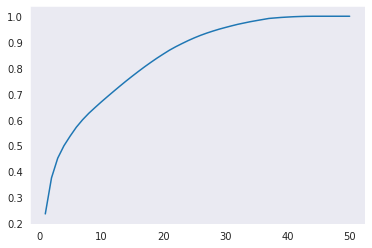

In [ ]:
plt.plot(x_plot,sum_var)

In [ ]:
pca_40 = PCA(n_components=40)
pca_40.fit(x)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_train_burotu = boruta_selector.transform(x_train)

In [ ]:
x_test_burotu = boruta_selector.transform(np.array(x_test))

In [ ]:
clf = rf.fit(x_train_burotu,y_train)

In [ ]:
predictions_rf = rf.predict(x_test_burotu)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions_rf)

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train_burotu,y_train)

In [ ]:
predictions_xgb = xgb.predict(x_test_burotu)

In [ ]:
roc_auc_score(y_test,predictions_xgb)

In [ ]:
test_burotu=boruta_selector.transform(np.array(test))

In [ ]:
test_predictions = xgb.predict(test_burotu)

In [ ]:
submission.head()

In [ ]:
test_1.head()

In [ ]:
test_2 = pd.read_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/Test (2).csv")

In [ ]:
drop_df = test_2.drop('Applicant_ID',axis=1)

In [ ]:
drop_test_columns=list(drop_df.columns)

In [ ]:
submission.head()

In [ ]:
submission_df = test_2.drop(drop_test_columns,axis=1)

In [ ]:
submission_df.head()

In [ ]:
submission_df['default_status'] = test_predictions

In [ ]:
submission_df.to_csv("/content/drive/My Drive/Data science resources/ai bootcamp qualification/submissionAI1.csv",index=False)

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train_burotu,y_train)

In [ ]:
cat_predictions = cat.predict(x_test_burotu)

In [ ]:
roc_auc_score(y_test,cat_predictions)

In [ ]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(early_stopping = True)

In [ ]:
mlp.fit(x_train_burotu,y_train)
mlp_predictions = mlp.predict(x_test_burotu)
roc_auc_score(mlp_predictions,y_test)

In [ ]:
from lightgbm import LGBMClassifier 
lgm = LGBMClassifier()
lgm.fit(x_train_burotu,y_train)
lgm_predictions= lgm.predict(x_test_burotu)
roc_auc_score(y_test,lgm_predictions)

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=1000)
ada_boost.fit(x_train_burotu,y_train)

In [ ]:
roc_auc_score(ada_boost.predict(x_test_burotu),y_test)


In [ ]:
grad_class= GradientBoostingClassifier()
grad_class.fit(x_train_burotu,y_train)
roc_auc_score(grad_class.predict(x_test_burotu),y_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
logit_cv = LogisticRegressionCV(cv=5,n_jobs=-1,scoring='roc_auc')
logit_cv.fit(x_train_burotu,y_train)

In [ ]:
roc_auc_score(logit_cv.predict(x_test_burotu),y_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_burotu,y_train)
roc_auc_score(svc.predict(x_test_burotu),y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train_burotu,y_train)
roc_auc_score(dec_tree.predict(x_test_burotu),y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
kn = KNeighborsClassifier()
kn.fit(x_train_burotu,y_train)
roc_auc_score(kn.predict(x_test_burotu),y_test)